(1427, 2100, 3)


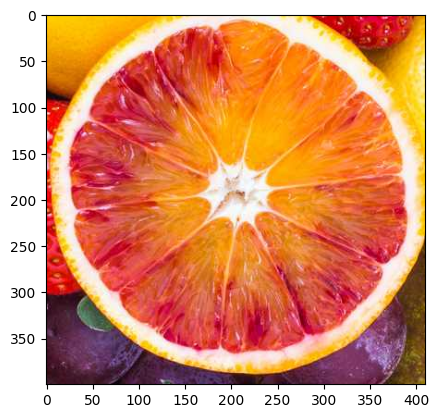

In [1]:
#1.Viết trương trình chuyển đổi ảnh
# 1.1 Chọn đối tượng trong ảnh
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

# Đọc ảnh đầu vào
data = iio.imread('fruit.jpg')

# Cắt vùng ảnh chứa đối tượng (từ hàng 800 đến 1200, cột 570 đến 980)
bmg = data[800:1200, 570:980]
print(data.shape)

# Lưu ảnh đã cắt thành file mới
iio.imsave('orange.jpg', bmg)

# Hiển thị ảnh đã cắt
plt.imshow(bmg)
plt.show()


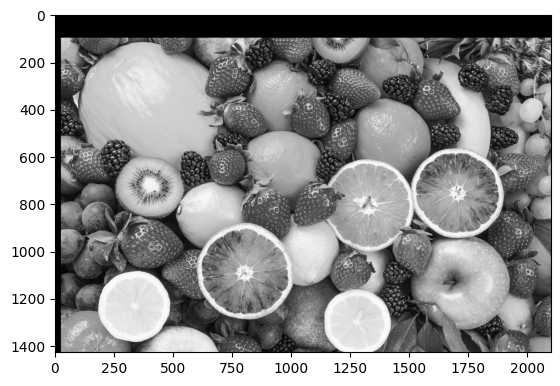

In [7]:
# 1.2 Tịnh tiến đơn
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

# Đọc ảnh đầu vào ở dạng ảnh xám (grayscale)
data = iio.imread('fruit.jpg', mode='L')

# Dịch chuyển ảnh: 100 pixel theo chiều dọc, 25 pixel theo chiều ngang
bdata = nd.shift(data, (100, 25))

# Hiển thị ảnh đã tịnh tiến
plt.imshow(bdata, cmap='gray')
plt.show()



(1427, 2100, 3)
(2854, 4200, 6)
(2854, 4200, 3)


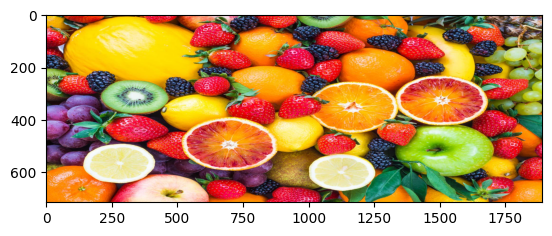

In [8]:
# 1.3 Thay đổi kích thước ảnh
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

data = iio.imread('fruit.jpg')
print(data.shape)

# Phóng to ảnh theo tỉ lệ (zoom 2 lần)
bdata = nd.zoom(data, 2)
print(bdata.shape)

# Phóng to theo chiều cao và chiều rộng (zoom riêng từng trục)
data2 = nd.zoom(data, (2, 2, 1))
print(data2.shape)

# Thu nhỏ theo từng tỉ lệ cụ thể
data3 = nd.zoom(data, (0.5, 0.9, 1))
plt.imshow(data3)
plt.show()


(1427, 2100, 3)


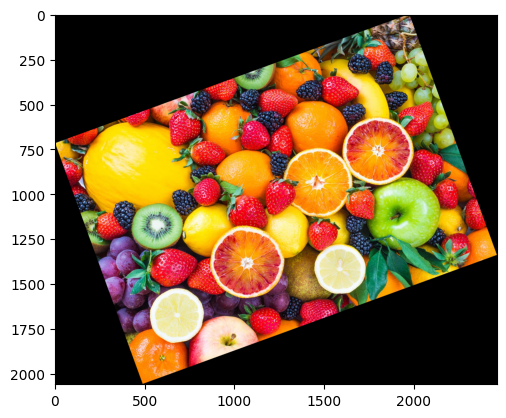

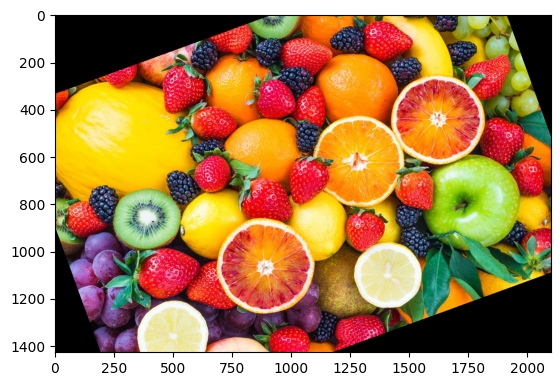

In [10]:
# 1.4 Xoay ảnh
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

# Đọc ảnh
data = iio.imread('fruit.jpg')
print(data.shape)

# Xoay ảnh 20 độ (cho phép reshape)
d1 = nd.rotate(data, 20)
plt.imshow(d1)
plt.show()

# Xoay ảnh 20 độ (giữ kích thước ảnh ban đầu)
d2 = nd.rotate(data, 20, reshape=False)
plt.imshow(d2)
plt.show()


(309, 515)


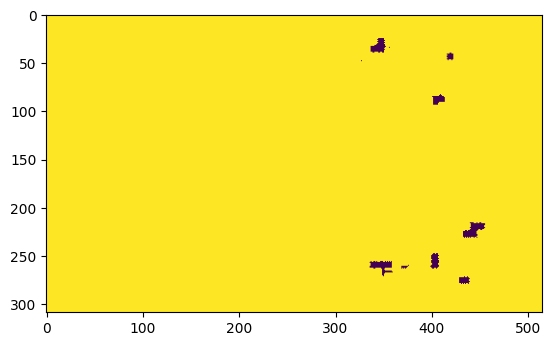

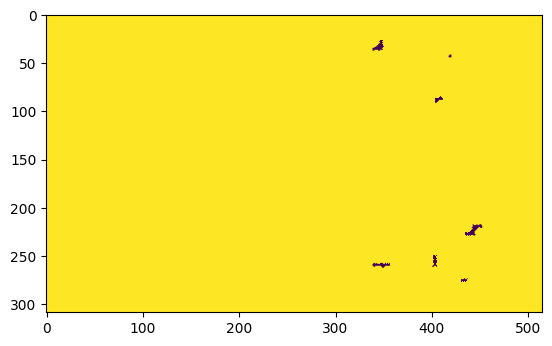

In [17]:
#1.5 Dilation và Erosion
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

# Đọc ảnh ở chế độ xám
data = iio.imread('world_cup.jpg', mode='F')
print(data.shape)

# Dilation mặc định (1 lần)
d1 = nd.binary_dilation(data)
plt.imshow(d1)
plt.show()

# Dilation 3 lần
d2 = nd.binary_dilation(data, iterations=3)
plt.imshow(d2)
plt.show()


(309, 515)


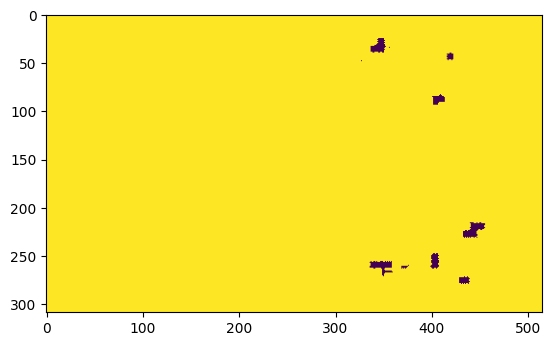

In [19]:
#1.6 Coordinate Mapping
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
import scipy.ndimage as nd

# Đọc ảnh grayscale
data = iio.imread('world_cup.jpg', mode='F')
print(data.shape)
V, H = data.shape

M = np.indices((V, H))

d = 5  # độ lệch tối đa
q = 2 * d * np.random.ranf(M.shape) - d  # nhiễu ngẫu nhiên
mp = (M + q).astype(int)

# Biến đổi ảnh theo mapping mới
bdata = nd.map_coordinates(data, mp)

plt.imshow(d1)
plt.show()


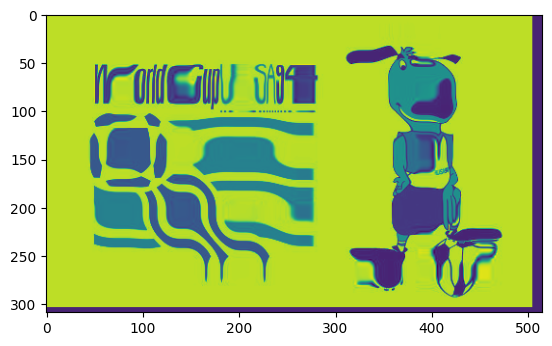

In [21]:
#1.7 Biến đổi chung (Generic Transformation )
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

# Định nghĩa hàm ánh xạ toạ độ (coordinate mapping function)
def GeoFun(outcoord):
    a = 10 * np.cos(outcoord[0] / 10.0) + outcoord[0]
    b = 10 * np.cos(outcoord[1] / 10.0) + outcoord[1]
    return a, b

# Đọc ảnh đầu vào
data = iio.imread('world_cup.jpg', mode='F')

# Thực hiện biến đổi hình học bằng hàm tự định nghĩa
d1 = nd.geometric_transform(data, GeoFun)

# Hiển thị ảnh sau biến đổi
plt.imshow(d1)
plt.show()


(1414, 2119, 3)


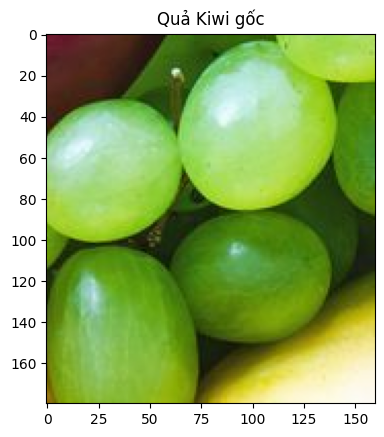

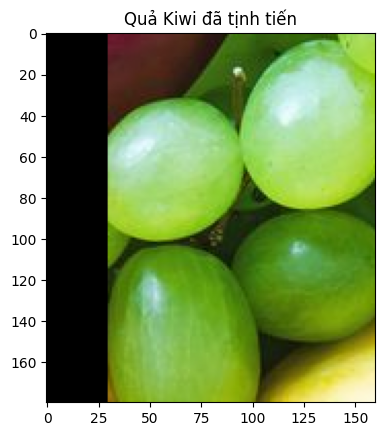

In [ ]:
#2 Bài tập
# Bài 1: Chọn quả kiwi và tịnh tiến sang phải 30 pixels

import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
import scipy.ndimage as nd
data = iio.imread('exercise/colorful-ripe-tropical-fruits.jpg')
print(data.shape)
kiwi = data[300:480, 920:1080]  
plt.imshow(kiwi)
plt.title("Quả Kiwi gốc")
plt.show()

kiwi_shifted = nd.shift(kiwi, (0, 30, 0))

plt.imshow(kiwi_shifted)
plt.title("Quả Kiwi đã tịnh tiến")
plt.show()

iio.imsave('kiwi_translated.jpg', kiwi_shifted)




(1414, 2119, 3)


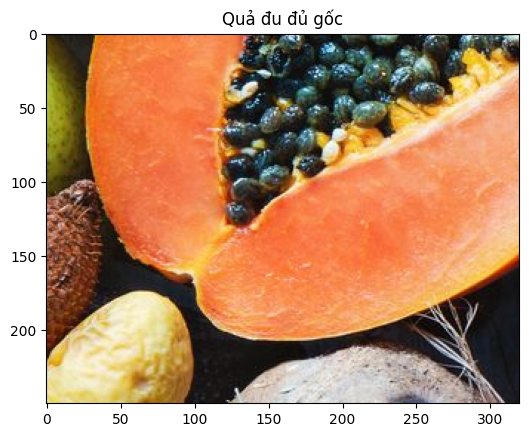

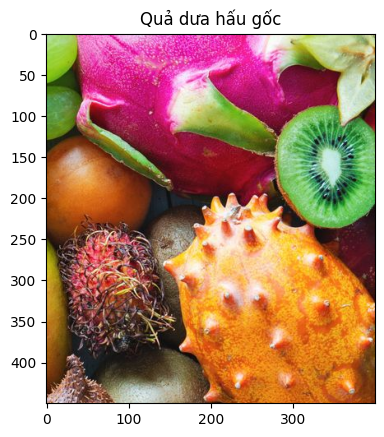

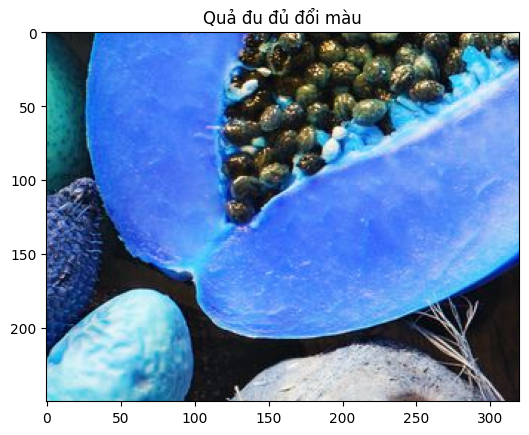

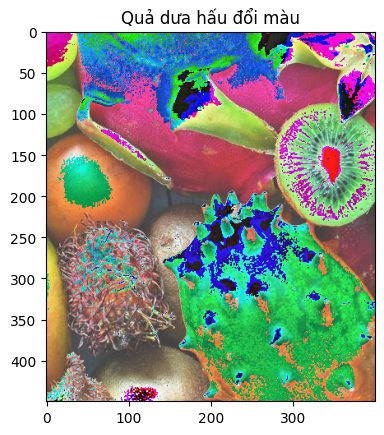

In [ ]:
# Bài 2: Chọn quả đu đủ và dưa hấu, đổi màu từng đối tượng

import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
data = iio.imread('exercise/colorful-ripe-tropical-fruits.jpg')
print(data.shape)
papaya = data[600:850, 100:420]
plt.imshow(papaya)
plt.title("Quả đu đủ gốc")
plt.show()
watermelon = data[200:650, 1200:1600]
plt.imshow(watermelon)
plt.title("Quả dưa hấu gốc")
plt.show()
papaya_colored = papaya[:, :, ::-1]
watermelon_colored = np.clip(watermelon + 50, 0, 255).astype(np.uint8)
plt.imshow(papaya_colored)
plt.title("Quả đu đủ đổi màu")
plt.show()
plt.imshow(watermelon_colored)
plt.title("Quả dưa hấu đổi màu")
plt.show()
iio.imsave('papaya_colored.jpg', papaya_colored)
iio.imsave('watermelon_colored.jpg', watermelon_colored)


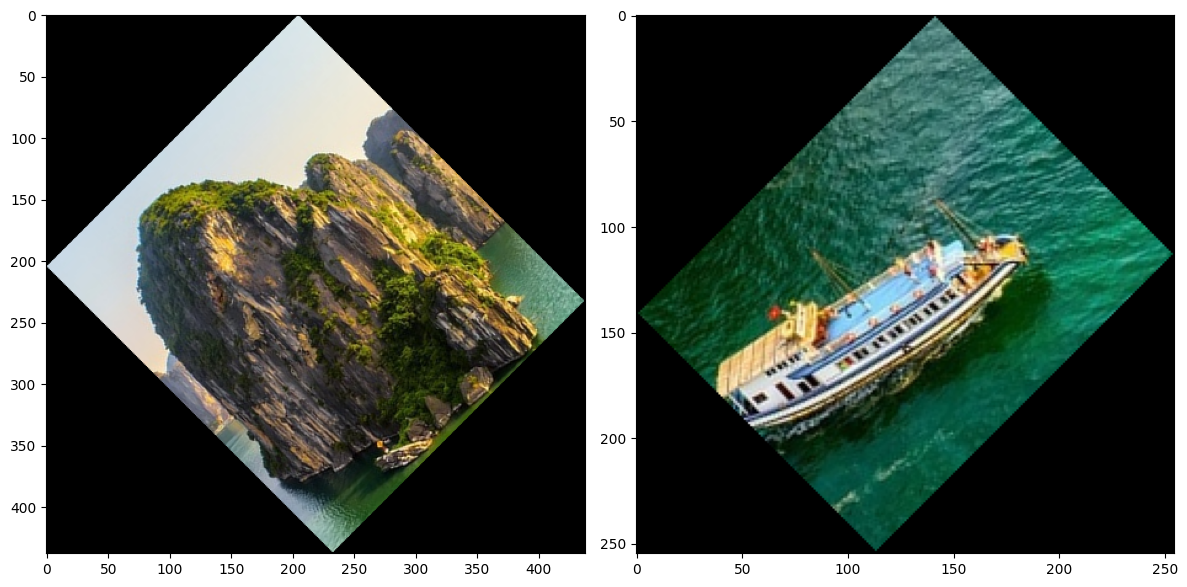

In [5]:
#Bài 3: Xoay ảnh của núi và thuyền
# Chọn vùng ảnh của núi và thuyền, sau đó xoay 45
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt
image = iio.imread('exercise/quang_ninh.jpg')
ngon_nui = image[0:330, 410: 700]
con_thuyen = image[420:580, 500:700]
xoay_ngon_nui = nd.rotate(ngon_nui, 45, reshape=True)
xoay_con_thuyen = nd.rotate(con_thuyen, 45, reshape=True)
iio.imsave('ngon_nui.jpg', xoay_ngon_nui)
iio.imsave('con_thuyen.jpg', xoay_con_thuyen)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(xoay_ngon_nui)
axes[1].imshow(xoay_con_thuyen)

plt.tight_layout()
plt.show()

C:\Users\lequo\AppData\Local\Temp\ipykernel_13212\2992718272.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = iio.imread('exercise/pagoda.jpg')


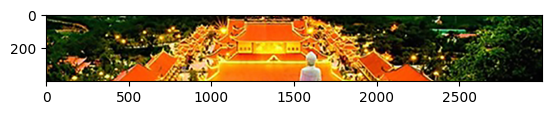

In [5]:
# Bài 4: Cắt ảnh chùa và phóng to 5 lần
import numpy as np
import scipy.ndimage as nd
import imageio as iio
import matplotlib.pylab as plt
image = iio.imread('exercise/pagoda.jpg')
ngoi_chua = image[130:210, 0:600]
tang_kich_thuoc_chua = nd.zoom(ngoi_chua, (5, 5, 1))
iio.imsave('pagoda_zoom_5_lan.jpg', tang_kich_thuoc_chua)
plt.imshow(tang_kich_thuoc_chua)
plt.show()


Danh sách hình ảnh trong thư mục 'exercise':
1. colorful-ripe-tropical-fruits.jpg
2. ha-long-bay-in-vietnam.jpg
3. pagoda.jpg
4. papaya.jpg
5. quang_ninh.jpg
6. watermelon.jpg

 Chọn thao tác:
T - Tịnh tiến
X - Xoay ảnh
P - Phóng to
H - Thu nhỏ
C - Coordinate Map


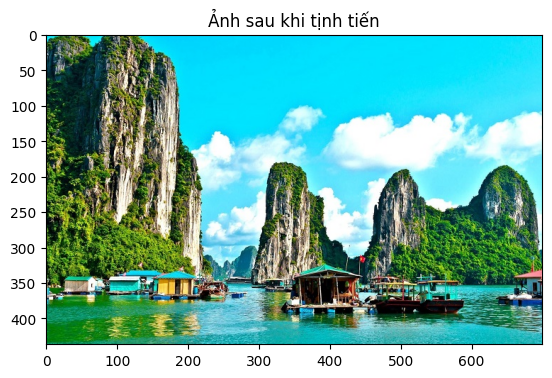

In [8]:
# Bài 5: Menu thực hiện các phép biến đổi trên hình
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pyplot as plt
import os

folder = 'exercise'
def hien_thi_anh(img, title="Kết quả"):
    plt.imshow(img.astype(np.uint8))
    plt.title(title)
    plt.show()
    
def tinh_tien(img, shift_x=30, shift_y=30):
    return nd.shift(img, shift=(shift_y, shift_x, 0))

def xoay(img, angle=45):
    return nd.rotate(img, angle, reshape=True)

def phong_to_hoac_thu_nho(img, factor):
    return nd.zoom(img, (factor, factor, 1))

def coordinate_map(img):
    if img.ndim == 3:
        data = img.mean(axis=2) 
    else:
        data = img

    print(data.shape)
    V, H = data.shape
    M = np.indices((V, H))
    d = 5
    q = 2 * d * np.random.ranf(M.shape) - d
    mp = (M + q).astype(int)
    mp[0] = np.clip(mp[0], 0, V - 1)
    mp[1] = np.clip(mp[1], 0, H - 1)
    d1 = nd.map_coordinates(data, mp)
    plt.imshow(d1, cmap='gray')
    plt.show()

files = [f for f in os.listdir(folder) if f.lower().endswith(('.jpg'))]
if not files:
    print("Không tìm thấy ảnh trong thư mục.")
    exit()
print("Danh sách hình ảnh trong thư mục 'exercise':")
for i, f in enumerate(files):
    print(f"{i+1}. {f}")
index = int(input("Chọn số thứ tự ảnh muốn xử lý: ")) - 1
if index < 0 or index >= len(files):
    print("Lựa chọn không hợp lệ.")
    exit()

file_path = os.path.join(folder, files[index])
img = iio.imread(file_path)
print("\n Chọn thao tác:")
print("T - Tịnh tiến")
print("X - Xoay ảnh")
print("P - Phóng to")
print("H - Thu nhỏ")
print("C - Coordinate Map")

choice = input("Nhập lựa chọn của bạn (T/X/P/H/C): ").strip().upper()
if choice == 'T':
    dx = int(input("Nhập giá trị tịnh tiến ngang (dx): "))
    dy = int(input("Nhập giá trị tịnh tiến dọc (dy): "))
    result = tinh_tien(img, dx, dy)
    hien_thi_anh(result, "Ảnh sau khi tịnh tiến")

elif choice == 'X':
    angle = float(input("Nhập góc xoay (độ): "))
    result = xoay(img, angle)
    hien_thi_anh(result, "Ảnh sau khi xoay")

elif choice == 'P':
    factor = float(input("Nhập hệ số phóng to (>1): "))
    result = phong_to_hoac_thu_nho(img, factor)
    hien_thi_anh(result, "Ảnh sau khi phóng to")

elif choice == 'H':
    factor = float(input("Nhập hệ số thu nhỏ (<1): "))
    result = phong_to_hoac_thu_nho(img, factor)
    hien_thi_anh(result, "Ảnh sau khi thu nhỏ")

elif choice == 'C':
    coordinate_map(img)

else:
    print("Lựa chọn không hợp lệ.")